In [121]:
# imports
from data_creation import create_data
from util import read_data, calculate_n_sets, save_ng_result, save_dng_results, read_ng_data, read_ng_test_data, read_dng_data, read_dng_test_data, calculate_route_costs, group_data_by
from routing import dynamic_ng_pathing, ng_routing_iteration, ng_routing_recursion
from computational_experiment import test_delta1_for_ng_routing, test_delta1_and_delta2_for_dng_pathing
from classes import SortOption, NgMode
from visualize import visualize_route, visualize_nodes
from nearest_neighbor import find_nearest_neighbours_path
import matplotlib.pyplot as plt
import shutil
import os
from statistics import mean

In [122]:
path = '/Users/lukas/Documents/Master Thesis/'

In [123]:
# what to do
create_new_data = False
clear_exports = True

conduct_nn_routing = True
conduct_ng_routing = False
conduct_dng_pathing = True
conduct_ng_testing = False
conduct_dng_testing = False

In [124]:
ng_mode = NgMode.recursion
ng_mode_dng = NgMode.recursion
ng_mode_ng_test = NgMode.recursion
ng_mode_dng_test = NgMode.recursion

In [125]:
# Data Creation Parameters
amount = 9
range_x = 100
range_y = 100

In [126]:
# Hyper Parameters
starting_node = 0
delta1 = 6
delta2 = 8

In [127]:
# Testing Parameters:
iterations_ng = 20
iterations_dng = 5

In [128]:
if os.path.isdir(path + "export"):
    if clear_exports:
        shutil.rmtree(path + "export")

In [129]:
# Data preparation
if create_new_data:
    create_data(amount, range_x, range_y, path)

costs_list, nodes = read_data(path)
node_objects = calculate_n_sets(costs_list, nodes, delta1)
to_visit = list(range(0, len(nodes)))
to_visit.remove(starting_node)

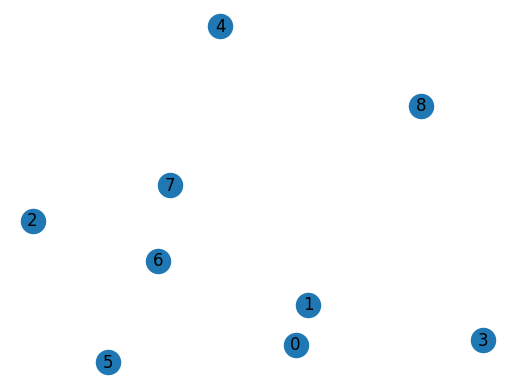

In [130]:
visualize_nodes(nodes)

Nearest Neighbor

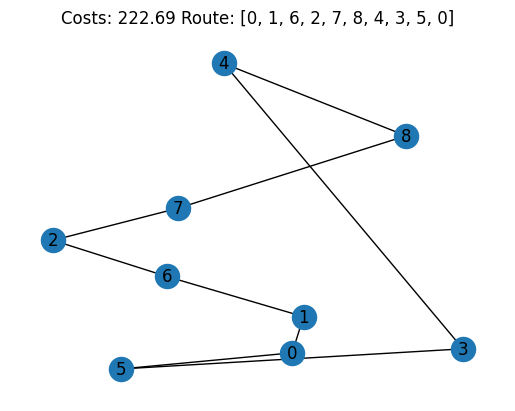

In [131]:
if conduct_nn_routing:
    nn_route = find_nearest_neighbours_path(nodes.copy(), costs_list, starting_node)
    visualize_route(nodes, nn_route, calculate_route_costs(nn_route, costs_list), True, "nn_route", 0, path)

Ng-Routing

In [132]:
if conduct_ng_routing:
    if ng_mode == NgMode.recursion:
        save_ng_result(path, ng_routing_recursion(starting_node, node_objects.copy(), costs_list))
    else:
        save_ng_result(path, ng_routing_iteration(starting_node, node_objects.copy(), costs_list))

    ng_data = read_ng_data(path)
    visualize_route(nodes, ng_data.best_route, ng_data.cost, True, "ng_route", 0, path)

Dynamic Ng-Pathing

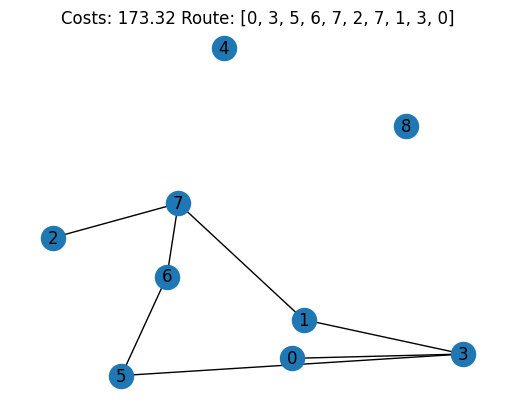

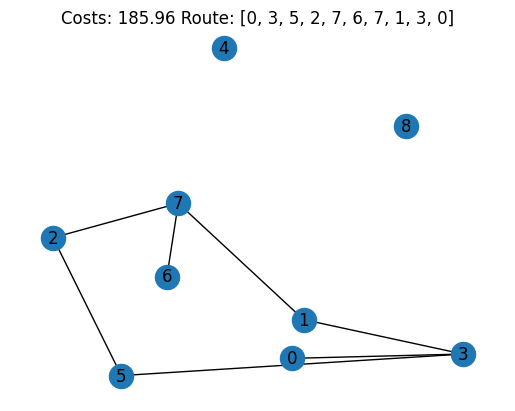

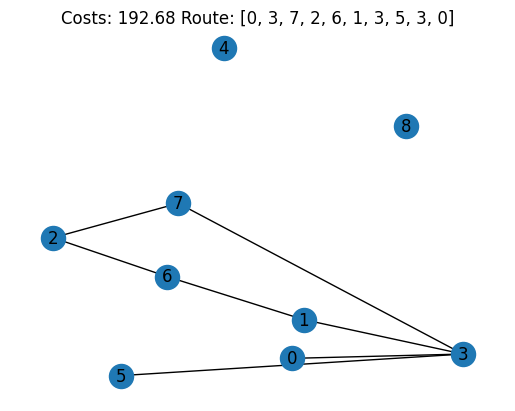

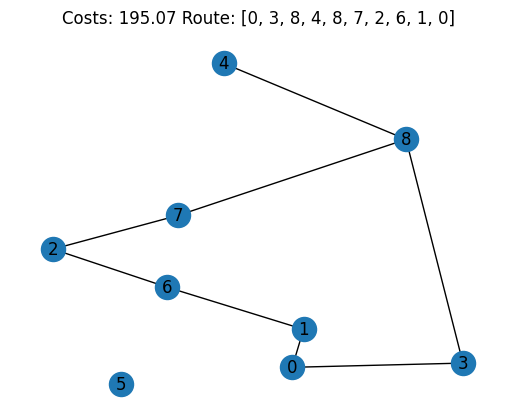

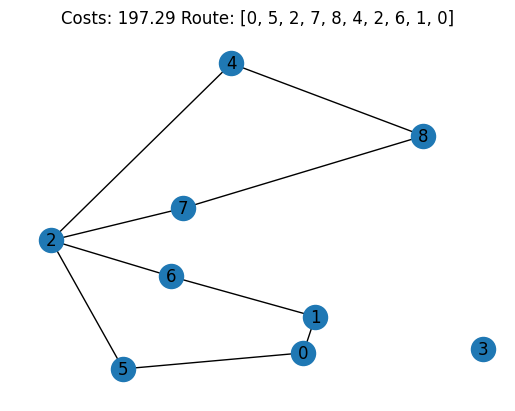

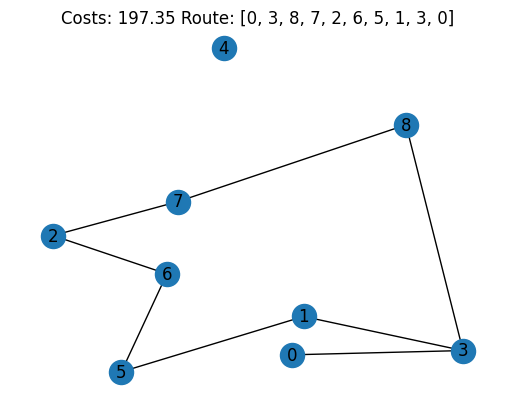

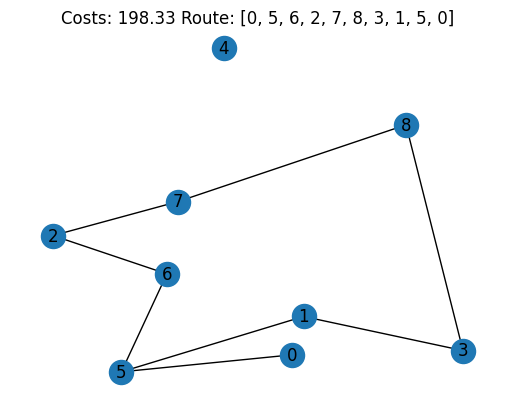

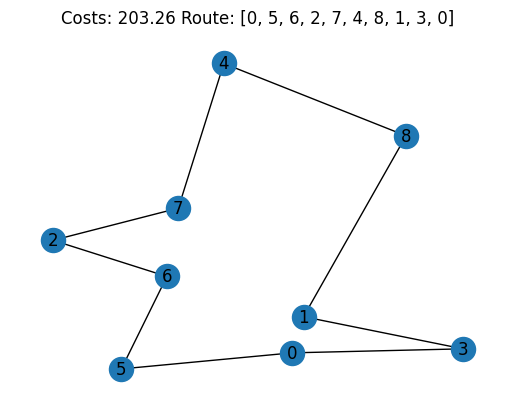

In [133]:
if conduct_dng_pathing:
    # dng_result, results = dynamic_ng_pathing(starting_node, node_objects.copy(), costs_list, delta2, ng_mode_dng)
    # save_dng_results(path, results)
    dng_data = read_dng_data(path)
    for i in range(0, len(dng_data)):
        plt.figure(i)
        visualize_route(nodes, dng_data[i].best_route, dng_data[i].cost, True, "dng_route_iteration", i+1, path)

Ng Testing

In [134]:
if conduct_ng_testing:
    # test_delta1_for_ng_routing(path, amount, range_x, range_y, starting_node, iterations_ng, ng_mode_ng_test)
    ng_test_data = read_ng_test_data(path)

    delta1_array = []
    for i in range(len(ng_test_data[0])):
        delta1_array.append(i+1)

    elementary_delta1 = []
    for result_list in ng_test_data:
        for result in result_list:
            if result.elementary:
                elementary_delta1.append(result.delta1)
                break

    time_difference = []
    cardinality_difference = []
    for result_list in ng_test_data:
        for i in range(0, len(result_list)-1):
            time_difference.append(result_list[i].time - result_list[i+1].time)
            cardinality_difference.append(result_list[i].cardinality - result_list[i+1].cardinality)

    time_per_delta1 = []
    cardinality_per_delta1 = []
    cost_per_delta1 = []
    iter_per_delta1 = []

    for result in ng_test_data[0]:
        time_per_delta1.append([])
        cardinality_per_delta1.append([])
        cost_per_delta1.append([])
        iter_per_delta1.append([])

    for i in range(len(ng_test_data)):
        for j in range(len(ng_test_data[i])):
            time_per_delta1[j].append(ng_test_data[i][j].time)
            cardinality_per_delta1[j].append(ng_test_data[i][j].cardinality)
            cost_per_delta1[j].append(ng_test_data[i][j].cost)
            iter_per_delta1[j].append(ng_test_data[i][j].ng_iterations)

    mean_time_per_delta1 = []
    for array in time_per_delta1:
        mean_time_per_delta1.append(mean(array))

    mean_iter_per_delta1 = []
    for array in iter_per_delta1:
        mean_iter_per_delta1.append(mean(array))

    mean_cardinality_per_delta1 = []
    for array in cardinality_per_delta1:
        mean_cardinality_per_delta1.append(mean(array))

    mean_cost_per_delta1 = []
    for array in cost_per_delta1:
        mean_cost_per_delta1.append(mean(array))

    print()
    print("Data of " + str(len(ng_test_data)) + " iterations")

    print()
    print("Finding Mean Delta1 for permitted solutions")
    print(round(mean(elementary_delta1), 3))
    print()

    print("Finding mean decrease in time for increase in delta1")
    print(round(mean(time_difference), 3))
    print()

    print("Finding mean decrease in cardinality for increase of delta1")
    print(round(mean(cardinality_difference), 3))

    # TODO plot mean_time_per_delta1 and mean_cardinality_per_delta1
    plt.figure(1)
    plt.title("Time Decrease for Increase of Delta1")
    plt.plot(delta1_array, mean_time_per_delta1)
    plt.ylabel('Time in seconds')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

    plt.figure(2)
    plt.title("Iterations Decrease for Increase of Delta1")
    plt.plot(delta1_array, mean_iter_per_delta1)
    plt.ylabel('Iterations in seconds')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

    plt.figure(3)
    plt.title("Cardinality Decrease for Increase of Delta1")
    plt.plot(delta1_array, mean_cardinality_per_delta1)
    plt.ylabel('Cardinality of final space-state graph')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

    plt.figure(4)
    plt.title("Cost Increase for Increase of Delta1")
    plt.plot(delta1_array, mean_cost_per_delta1)
    plt.ylabel('Cost of solution')
    plt.xlabel('Delta1')
    plt.axvline(x = round(mean(elementary_delta1), 3), color = 'r')
    plt.show()

Dng Testing

In [135]:
if conduct_dng_testing:
    test_delta1_and_delta2_for_dng_pathing(path, amount, range_x, range_y, starting_node, iterations_dng, ng_mode_dng_test)
    dng_test_data = read_dng_test_data(path)

    all_test_data = []
    for document in dng_test_data:
        all_test_data.extend(document)

    sorted_delta2 = group_data_by(all_test_data, SortOption.delta2)
    elementary, not_elementary = group_data_by(all_test_data, SortOption.elementary)
    sorted_iterations = group_data_by(all_test_data, SortOption.iterations)
    sorted_start_delta1 = group_data_by(all_test_data, SortOption.start_delta1)
    sorted_final_delta1 = group_data_by(all_test_data, SortOption.final_delta1)
    exceeded, not_exceeded = group_data_by(all_test_data, SortOption.exceeded)

    delta2_array = []
    for i in range(len(sorted_delta2)):
        delta2_array.append(i+1)

    mean_iterations_per_delta2 = []
    mean_time_per_delta2 = []
    mean_cardinality_per_delta2 = []
    mean_final_delta1_per_delta2 = []
    for delta2_list in sorted_delta2:
        iterations = []
        time = []
        cardinality = []
        final_delta1 = []
        for item in delta2_list:
            iterations.append(item.ng_iterations)
            time.append(item.time)
            cardinality.append(item.cardinality)
            final_delta1.append(item.final_delta1)
        mean_iterations_per_delta2.append(round(mean(iterations)))
        mean_time_per_delta2.append(round(mean(time)))
        mean_cardinality_per_delta2.append(round(mean(cardinality)))
        mean_final_delta1_per_delta2.append(round(mean(final_delta1), 3))

    all_final_delta1 = []
    for item in elementary:
        all_final_delta1.append(item.final_delta1)
    mean_final_delta1 = round(mean(all_final_delta1), 3)

    success_percent_per_delta2 = []
    for delta2_list in sorted_delta2:
        suc = 0
        for item in delta2_list:
            if item.elementary:
                suc += 1
        percent = suc / len(delta2_list)
        success_percent_per_delta2.append(percent)

    plt.figure(5)
    plt.title("Final Delta1 to Delta2")
    plt.plot(delta2_array, delta2_array)
    plt.plot(delta2_array, mean_final_delta1_per_delta2)
    plt.ylabel('delta1/delta2')
    plt.xlabel('delta2/delta2')
    plt.show()

    plt.figure(4)
    plt.title("Successful Dng Routings")
    plt.plot(delta2_array, success_percent_per_delta2)
    plt.ylabel('success in percent')
    plt.xlabel('delta2')
    plt.show()

    plt.figure(1)
    plt.title("Mean Iteration Amount per Delta2")
    plt.plot(delta2_array, mean_iterations_per_delta2)
    plt.ylabel('mean iterations')
    plt.xlabel('delta2')
    plt.show()

    plt.figure(2)
    plt.title("Mean Time Consumption per Delta2")
    plt.plot(delta2_array, mean_time_per_delta2)
    plt.ylabel('mean time')
    plt.xlabel('delta2')
    plt.show()

    plt.figure(3)
    plt.title("Mean Cardinality of final space-state-graph per Delta2")
    plt.plot(delta2_array, mean_cardinality_per_delta2)
    plt.ylabel('mean cardinality')
    # plt.axvline(x = mean_final_delta1, color = 'r')
    plt.xlabel('delta2')
    plt.show()